In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
# Densities
def prior(theta):
    return np.exp(-theta**2/2)/np.sqrt(2*np.pi)

def likelihood(x, theta, weights, mean_shifts):
    """
    Returns density of MOG with weights and means given below (all variances are 1)
    means of component i = theta + mean_shift[i]
    """
    density = 0
    for w, m_s in zip(weights, mean_shifts):
        density += w * np.exp(-(x-theta-m_s)**2/2) / np.sqrt(2*np.pi)
    return density

def posterior(theta, x, weights, mean_shifts):
    evidence = sum([w * np.exp(-(x-m_s)**2/4) for w,m_s in zip(weights, mean_shifts)])/(2*np.sqrt(np.pi))
    return (prior(theta) * likelihood(x, theta, weights, mean_shifts))/evidence


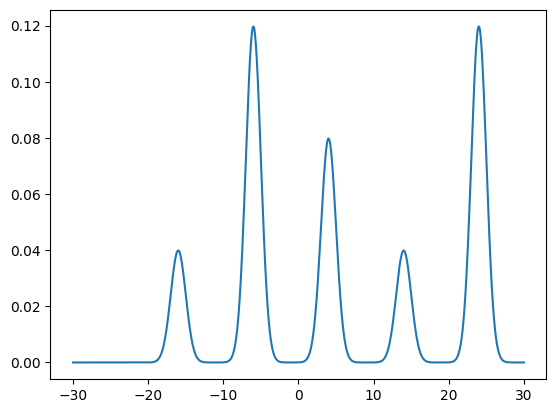

In [130]:
x = np.linspace(-30,30,1000)
theta = 4
weights = [0.1,0.3,0.2,0.1,0.3]
mean_shifts = [-20,-10,0,10,20]
plt.plot(x, likelihood(x, theta, weights, mean_shifts))

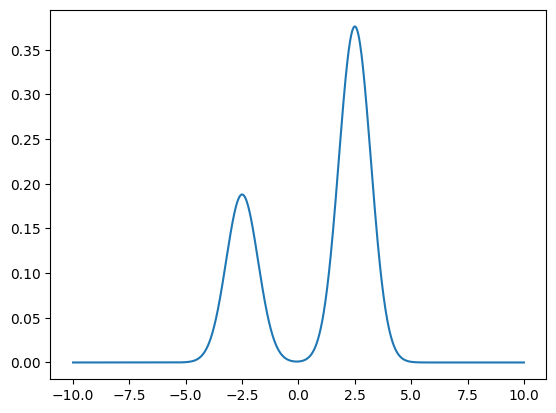

In [131]:
theta = np.linspace(-10,10,1000)
x = 5
weights = [0.1,0.3,0.2,0.1,0.3]
mean_shifts = [-20,-10,0,10,20]
plt.plot(theta, posterior(theta, x, weights, mean_shifts))